# Mathematical intuition of gradient descent
> Understanding and coding gradient descent from scratch

- toc: true 
- badges: true
- comments: true
- author: Gieun Kwak
- categories: [optimization, gradient descent]

In [1]:
# collapse

import matplotlib.pyplot as plt
import numpy as np
from sympy import *
# from IPython.display import set_matplotlib_formats
# import matplotlib_inline.backend_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('png')

### 1. How gradient descent looks like

Gradient descent is commonly used in ML and AI. Looking at the image below, we encounter from lectures that the gradient descent is a 'process of finding the most lowest point of the function'. While this is a very concise and accurate explanation of gradient descent, understanding it in a mathematical way would enable a deeper understanding.

![](my_icons/03_/gradient-descent-example.png)


### 2. How gradient descent works: simple maths

The gradient descent image above goes through a line until it reaches the 'bottom' of the function. This 'bottom' of the function is called 'minimum'. We want to reach the minimum because it will give us the best values for our problem. One of the common use of gradient is when we estimate the parameters of a ML or AI model. We want to find the paramaters that has the smalles loss value (closes to the actual observation).

Lets consider a function $y = (x-5)^2$. We want to find the minimum value of this function by following a sequence of steps.
1. Start from a certain point
2. Move to a new point that gives a better objective value (here, smaller values)
3. Repeat step 2

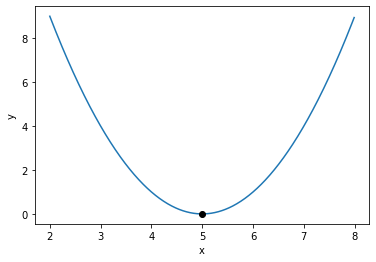

In [2]:
# collapse

# x = np.arange(2, 8, 0.01)
# def y(x):
#     return (x-5)**2

# fig, ax = plt.subplots()
# ax.plot(x, y(x))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.plot([5], y(5), marker='o', color='black');

One thing most explanations exclude is the constraint. Actually, for every optimization problem, there is an objective function and a constraint. The objective function is $y = (x-5)^2$. And the constraint is hidden, which is $x \in R$, $y \in R$ ($R$ means real numbers).

The optimization problem changes along the constraints, but for now lets say the constraint is $y \geq (x-5)^2$. This means the set of potential solutions for this problem is all the points above the function line.

The process of gradient descent will only happen inside the blue area (points that satisfy the constraints)

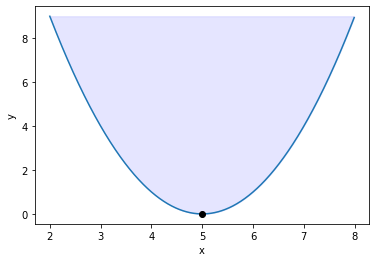

In [3]:
# collapse

# x = np.arange(2, 8, 0.01)
# def y(x):
#     return (x-5)**2

# fig, ax = plt.subplots()
# ax.plot(x, y(x))
# ax.set_xlabel("x")
# ax.set_ylabel("y")

# ax.fill_between(x, y(x), 9, color='blue', alpha=.1)
# ax.plot([5], y(5), marker='o', color='black');

Now lets say we start at a point where $x=7$ and $y=4$

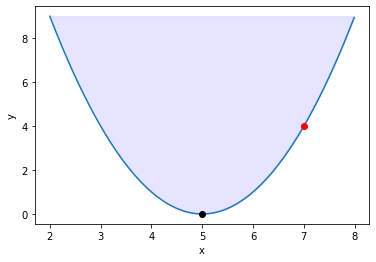

In [4]:
# collapse

# x = np.arange(2, 8, 0.01)
# def y(x):
#     return (x-5)**2

# fig, ax = plt.subplots()
# ax.plot(x, y(x))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.fill_between(x, y(x), 9, color='blue', alpha=.1)

# ax.plot([7], y(7), marker='o', color='red')
# ax.plot([5], y(5), marker='o', color='black');

This red dot can go anywhere as long as it is in the blue area. Lets say this dot moves to $(6,6)$. This point is still in the blue area and satisfies the constraint we have set. This is called feasibility.

- __The process of gradient descent ONLY considers the solutions that are feasible (satisfies constraints)__

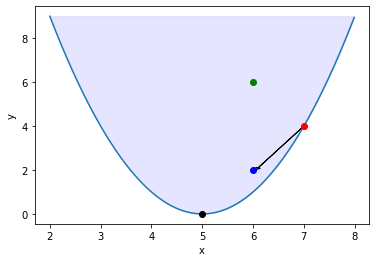

In [5]:
# collapse

# x = np.arange(2, 8, 0.01)
# def y(x):
#     return (x-5)**2

# fig, ax = plt.subplots()
# ax.plot(x, y(x))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.fill_between(x, y(x), 9, color='blue', alpha=.1)

# ax.plot([7], y(7), marker='o', color='red')
# ax.plot([6], 6, marker='o', color='green')
# ax.plot([6], 2, marker='o', color='blue')
# ax.plot([5], y(5), marker='o', color='black')

# ax.arrow(7, y(7), 6-7+0.1, 2-y(7)+0.1, head_width=0.1, head_length=0.1);

While the point $(6,6)$ is feasible, does it go to the optimal value? The optimal value we want to find is the smallest point of $y=(x-5)^2$.

Y value when x=7 : 4 <br>
Y value when x=6 : 6

The value of the function rather increased, and it means that this is not the right direction.

If the red dot goes to the direction of blue dot, the objective function decreases. This then would be the right direction we want to go. And the 'amount' we want to move is the learning rate($\lambda$) which is a small step towards the direction.

- __The solution for each step is updated by $x^1 = x^0 + \lambda d^0$, and the direction is where the optimal value gets closer to the global minimum.__

### 3. How is gradient calculated?

There are two aspects in calculating gradient. First is the 'direction', and the second is the 'distance'. <br> Lets say $d$ is for firection and $\alpha$ for step size ('distance'). Then this could be formulated as the following: $f(x^k + \alpha d^k) < f(x^k)$, which means the new value is smaller than the current function value. <br>
Using Taylor's expanson, it could be formulated as $f(x^k + \alpha d^k) \approx f(x^k) + \alpha\nabla f(x^k)^T d_k$ <br>
Since $f(x^k + \alpha d^k) < f(x^k)$, we want $\alpha\nabla f(x^k)^T d_k$ to be smaller than zero. The steepest direction $d_k$ would be $-\nabla f(x^k)$ since it is the opposite direction from $\nabla f(x^k)^T$

Then, the new point is updated every step by $x^{k+1} \leftarrow x_k - \alpha \nabla f(x_k)$

This process will continue until $||\nabla f(x_k)|| \leq \epsilon$ where $\epsilon$ is a very small number. This is the point where the gradient is small enough or vanishes. This means that there is no more 'movement'.

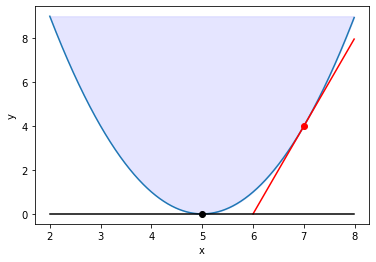

In [2]:
# collapse

# x = np.arange(2, 8, 0.01)
# def y(x):
#     return (x-5)**2

# fig, ax = plt.subplots()
# ax.plot(x, y(x))
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.fill_between(x, y(x), 9, color='blue', alpha=.1)

# ax.plot([7], y(7), marker='o', color='red')
# ax.plot([5], y(5), marker='o', color='black')

# def line1(x):
#     return 4*x - 24
# def line2(x):
#     return x*0

# ax.plot(np.arange(6, 8, 0.01), line1(np.arange(6, 8, 0.01)), color='red')
# ax.plot(x, line2(x), color='black');

The red dot has a negative gradient, and it moves the point towards left. If the point reaches the black dot, the gradient is zero (vanishes), meaning there is no further direction for the point to move, indicating the end of the search.

### 4. Newton's method from scratch

One of the methods of gradient descent is Newton's method.

Let $x^k$ be the current state and consider a second order Taylor approximation of $f(x)$. <br>
$g(x) = f(x^k)+\nabla f(x^k)^T (x-x^k) + \frac{1}{2}(x-x^k)\nabla^2f(x^k)(x-x^k)$

The next step would be to find the point that minimizes the function $g(x)$. That point would be where the first derivative equals to zero.
$\nabla g(x) = \nabla f(x^k)+\nabla^2f(x^k)(x-x^k) = 0$

Solving this equation for $x$, this gives us <br>
$x = x^k - [\nabla^2f(x_k)]^{-1} \nabla f(x^k)$ which will be the new $x^{k+1}$

To formulate this into the code, here is the psuedo code.

![](my_icons/03_/newtons_method.PNG)

#### Parameters

- $k$ is the indicator for current step 
- $\epsilon$ is the minimum value for stopping the search
- $\alpha$ is the step size. $\alpha$ changes via line search. This means that we want to find a step size that actually leads to minimizing the function value
- $\rho$ and $c$ are scalars used to derive $\alpha$ during line search. They are between 0 and 1

#### Code walkthrough

- Set the initial values for $\alpha$, $d$, $k$. Initial starting point $x^0$ will be provided via input
- The search ends only if the first derivative of $f(x)$ is smaller than $\epsilon$. Here, it is actually the norm value of the vector.
- Inside the search, first determine perform line search to find $\alpha$
    - If $\alpha$ is found, update $x^{k+1}$ as well as $d^{k+1}$
- Continue until vanishing gradient or when it is small enough

#### Coding - from scratch

Lets solve the optimzal minimum value for the following function.
$$y = 100(x_2-x_1^2)^2 + (1-x_1)^2$$

---
END